In [12]:
from chesslab_.agent_tf import agent
from chesslab_.agent_stockfish import agent as s_agent
from chesslab_.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
class Model_1():
    def __init__(self,
                   n_classes=2):
        initializer = tf.keras.initializers.GlorotNormal()
        self.hw=[]
        self.hb=[]

        self.hw.append( tf.Variable(initializer(shape=(7,7,3,32)),name="hl1weigths",dtype="float32") )
        self.hb.append( tf.Variable(np.zeros(32),name="hl1bias",dtype="float32") )
        #8x8x32
        self.hw.append( tf.Variable(initializer(shape=(5,5,32,64)),name="hl2weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(64),name="hl2bias",dtype="float32"))
        #8x8x64
        self.hw.append( tf.Variable(initializer(shape=(3,3,64,128)),name="hl3weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(128),name="hl3bias",dtype="float32"))
        #8x8x128
        self.hw.append( tf.Variable(initializer(shape=(8*8*128,256)),name="hl4weigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(256),name="hl4bias",dtype="float32"))

        self.hw.append( tf.Variable(initializer(shape=(256, n_classes)),name="outweigths",dtype="float32"))
        self.hb.append( tf.Variable(np.zeros(n_classes),name="outbias",dtype="float32"))

        self.trainable_variables = []
        for i in range(len(self.hw)):
            self.trainable_variables.append(self.hw[i])    
            self.trainable_variables.append(self.hb[i])

    def __call__(self,x): 

        # Declarando la arquitectura
        out = tf.cast(x, tf.float32)
        out = tf.reshape(out, shape=[-1, 8, 8, 3])

        layer=0
        out = tf.add(out, 1e-8)
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*32
        layer+=1
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*64
        layer+=1  
        out = tf.nn.conv2d(out,self.hw[layer], strides=[1,1,1,1], padding='SAME')  
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)
              #8*8*128
        layer+=1
        out =  tf.reshape(out,[-1, 8*8*128])
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])
        out = tf.nn.elu(out)

        layer+=1
        out =  tf.matmul(out,self.hw[layer])
        out = tf.add(out, self.hb[layer])

        return out
model = Model_1()

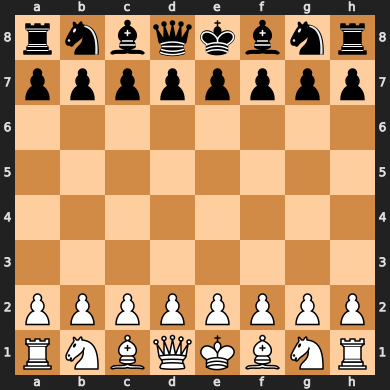

In [3]:
board=chess.Board()
board

In [14]:
base_name = './tmp/tf_elo.0.4.h5'
deepbot = agent(base_name,model)
move=deepbot.select_move(board)
move

Move.from_uci('g7g5')

In [15]:
moves,values=deepbot.get_move_values(board)

In [16]:
moves

[Move.from_uci('g8h6'),
 Move.from_uci('g8f6'),
 Move.from_uci('b8c6'),
 Move.from_uci('b8a6'),
 Move.from_uci('h7h6'),
 Move.from_uci('g7g6'),
 Move.from_uci('f7f6'),
 Move.from_uci('e7e6'),
 Move.from_uci('d7d6'),
 Move.from_uci('c7c6'),
 Move.from_uci('b7b6'),
 Move.from_uci('a7a6'),
 Move.from_uci('h7h5'),
 Move.from_uci('g7g5'),
 Move.from_uci('f7f5'),
 Move.from_uci('e7e5'),
 Move.from_uci('d7d5'),
 Move.from_uci('c7c5'),
 Move.from_uci('b7b5'),
 Move.from_uci('a7a5')]

In [17]:
values

array([0.7509924 , 0.7270356 , 0.7633173 , 0.75251526, 0.7366074 ,
       0.7565229 , 0.68833524, 0.7039391 , 0.78677225, 0.72334474,
       0.7180887 , 0.75486475, 0.7330102 , 0.79945886, 0.7084782 ,
       0.7102103 , 0.77137667, 0.7456152 , 0.72510165, 0.7238754 ],
      dtype=float32)

In [18]:
from chesslab_.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('g7g5'), 0.7994588613510132],
       [Move.from_uci('d7d6'), 0.7867722511291504],
       [Move.from_uci('d7d5'), 0.7713766694068909],
       [Move.from_uci('b8c6'), 0.7633172869682312],
       [Move.from_uci('g7g6'), 0.7565228939056396],
       [Move.from_uci('a7a6'), 0.7548647522926331],
       [Move.from_uci('b8a6'), 0.7525152564048767],
       [Move.from_uci('g8h6'), 0.7509924173355103],
       [Move.from_uci('c7c5'), 0.7456151843070984],
       [Move.from_uci('h7h6'), 0.7366073727607727],
       [Move.from_uci('h7h5'), 0.7330101728439331],
       [Move.from_uci('g8f6'), 0.7270355820655823],
       [Move.from_uci('b7b5'), 0.7251016497612],
       [Move.from_uci('a7a5'), 0.7238754034042358],
       [Move.from_uci('c7c6'), 0.7233447432518005],
       [Move.from_uci('b7b6'), 0.718088686466217],
       [Move.from_uci('e7e5'), 0.7102103233337402],
       [Move.from_uci('f7f5'), 0.7084782123565674],
       [Move.from_uci('e7e6'), 0.7039390802383423],
       [Move.fro

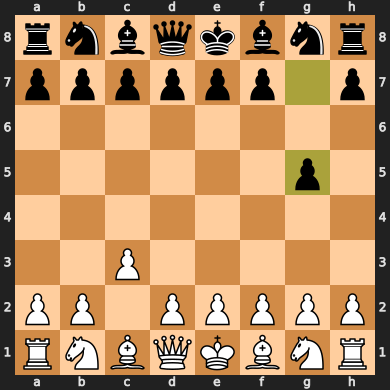

In [19]:
board.push(move)
board

In [20]:
import chess.svg
from IPython.display import display
acc,acc_w,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {} | weighted = {:.2}'.format(acc*25,acc,acc_w))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

Kaufman test 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Accuracy: 3/25 = 0.12 | weighted = 0.71
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 36 & 48 & 0.2553 & 0.3286 & f2f4 & 0.6177  \\
02 & f5d4 & 18 & 39 & 0.5526 & 0.8960 & a5a3 & 0.9701  \\
03 & e1d1 & 18 & 38 & 0.5405 & 0.0342 & f2c5 & 0.8629  \\
04 & b1b2 & 7 & 47 & 0.8696 & 0.5165 & c2d4 & 0.5512  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.8097 & c8c3 & 0.9052  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.6224 & a3e3 & 0.7100  \\
07 & b7e4 & 2 & 33 & 0.9688 & 0.7104 & d7e5 & 0.7162  \\
08 & h7h6 & 9 & 39 & 0.7895 & 0.7879 & e1c1 & 0.9398  \\
09 & f3e2 & 12 & 35 & 0.6765 & 0.2478 & g2g4 & 0.4774  \\
10 & d5c3 & 1 & 41 & 1.0000 & 0.9637 & d5c3 & 0.9637  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9911 & g3f5 & 0.9911  \\
12 & c6d6 & 2 & 41 & 0.9750 & 0.4743 & c6c8 & 0.4923  \\
13 & c3d5 & 25 & 30 & 0.1724 & 0.9094 & f1f6 & 0.9873  \\
14 & b1b2 & 2 & 49 & 0.9792 & 0.8564 & a2a4 & 0.8752  \\
15 & d3f5 & 3 & 51

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,0.328621,f2f4,0.617716,36,48,0.255319
1,f5d4,0.895952,a5a3,0.970105,18,39,0.552632
2,e1d1,0.034168,f2c5,0.862947,18,38,0.540541
3,b1b2,0.516478,c2d4,0.551218,7,47,0.869565
4,g5c1,0.809670,c8c3,0.905165,2,48,0.978723
5,a3a2,0.622402,a3e3,0.709974,2,31,0.966667
6,b7e4,0.710423,d7e5,0.716234,2,33,0.968750
7,h7h6,0.787938,e1c1,0.939760,9,39,0.789474
8,f3e2,0.247818,g2g4,0.477448,12,35,0.676471
9,d5c3,0.963720,d5c3,0.963720,1,41,1.000000
